In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston,load_iris
%matplotlib inline

In [52]:
ds=pd.read_csv("housing.txt",delimiter=',')
ds.columns=["house_size","no_rooms","price"]
ds

,house_size,no_rooms,price
0,1600,3,329900
1,2400,3,369000
2,1416,2,232000
3,3000,4,539900
4,1985,4,299900
5,1534,3,314900
6,1427,3,198999
7,1380,3,212000
8,1494,3,242500
9,1940,4,239999


In [16]:
#Linear Regression (Manual)
x_mean = np.mean(ds['house_size'])
y_mean = np.mean(ds['price'])
sum , sum2 = 0 , 0
for i in range(len(ds)):
    sum += (ds['house_size'][i] - x_mean)*(ds['price'][i] - y_mean)
    sum2 += (ds['house_size'][i] - x_mean)**2
    
m = sum/sum2
c = y_mean - (m*x_mean)
m,c

(134.359569402993, 70610.61965047085)

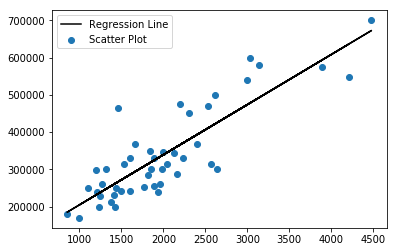

In [26]:
x = ds['house_size']
y = ds['price']
y2 = m*x + c
mp.scatter(x,y,label="Scatter Plot")
mp.plot(x,y2,label="Regression Line",color="#000000")
mp.legend()
mp.show()

In [27]:
#R2 Score
num , den = 0,0
for i in range(len(ds)):
    y_pred = m*ds['house_size'][i] + c
    num += (y_pred - y_mean)**2
    den += (ds['price'][i] - y_mean)**2
num/den

0.7326131742191895

In [55]:
#Multiple Linear Regression
l_Reg = LinearRegression()
X = x.values.reshape(-1,1)
Y = y.values.reshape(-1,1)
X_rooms = ds['no_rooms'].values.reshape(-1,1)
l_Reg.fit(ds[['house_size','no_rooms']],ds['price'])
l_Reg.predict(ds[['house_size','no_rooms']])
r2_score = l_Reg.score(ds[['house_size','no_rooms']],ds['price'])
r2_score

0.7343207791741682

In [80]:
#Gradient Descent
def grad_desc(xcoord,ycoord,no_of_iterations=10000,learning_rate=0.1):
    m,c=0,0
    n = len(ds)
    for i in range(no_of_iterations):
        y_pred = m*xcoord + c
        md = -(2/n)*np.sum(xcoord*(ycoord-y_pred))
        cd = -(2/n)*np.sum(ycoord-y_pred)
        cost = (np.sum(ycoord-y_pred)**2)*0.5
        m = m - (learning_rate*md)
        c = c - (learning_rate*cd)
        print("m {} c{} iteration{} cost {}".format(m,c,i,cost))
grad_desc(np.array([1,2,3,4,5]),np.array([5,7,9,11,13]))

m 0.6739130434782609 c0.1956521739130435 iteration0 cost 1012.5
m 1.173913043478261 c0.3431001890359169 iteration1 cost 575.0472589792062
m 1.5447316511876388 c0.45473411687351034 iteration2 cost 329.6234401856768
m 1.8195957704553658 c0.5397573979509793 iteration3 cost 191.20594770096594
m 2.0231865167844534 c0.6050064260093038 iteration4 cost 112.60917327460643
m 2.1738371480310423 c0.6555593395666371 iteration5 cost 67.59554247862664
m 2.2851656991823166 c0.6951882355740335 iteration6 cost 41.53838659733535
m 2.3672877122751954 c0.7266950761583599 iteration7 cost 26.256412545382954
m 2.4277170587207992 c0.7521612019630567 iteration8 cost 17.153448254592053
m 2.472035074985626 c0.7731326720038076 iteration9 cost 11.632777597474583
m 2.5043876001844674 c0.7907579351133579 iteration10 cost 8.216689846559142
m 2.5278541782851365 c0.8058900930336457 iteration11 cost 6.056579277933802
m 2.544722303497366 c0.8191628619925793 iteration12 cost 4.659601169894758
m 2.556691131226741 c0.8310469

m 2.0574769521484173 c2.7924899654060567 iteration649 cost 0.015495540921753719
m 2.0572657267168792 c2.793252556235376 iteration650 cost 0.015381859244845463
m 2.057055277530101 c2.7940123445748104 iteration651 cost 0.01526901158358924
m 2.0568456017354153 c2.794769340723395 iteration652 cost 0.015156991819302579
m 2.056636696490638 c2.795523554942316 iteration653 cost 0.015045793878192234
m 2.05642855896403 c2.79627499745505 iteration654 cost 0.014935411731023463
m 2.056221186334259 c2.7970236784475033 iteration655 cost 0.014825839392796558
m 2.05601457579036 c2.7977696080681493 iteration656 cost 0.014717070922417712
m 2.055808724531699 c2.798512796428166 iteration657 cost 0.014609100422382913
m 2.055603629767934 c2.7992532536015737 iteration658 cost 0.014501922038452046
m 2.0553992887189776 c2.79999098962537 iteration659 cost 0.014395529959334907
m 2.0551956986149587 c2.8007260144996677 iteration660 cost 0.014289918416374283
m 2.054992856696186 c2.80145833818783 iteration661 cost 0.

m 2.0039833819430424 c2.9856187272653703 iteration1374 cost 7.44257433214404e-05
m 2.0039687431784863 c2.9856715778502725 iteration1375 cost 7.387972538323449e-05
m 2.003954158210787 c2.9857242342114523 iteration1376 cost 7.333771325772185e-05
m 2.0039396268422434 c2.985776697062674 iteration1377 cost 7.279967755663671e-05
m 2.0039251488758802 c2.985828967115078 iteration1378 cost 7.226558910721664e-05
m 2.0039107241154475 c2.9858810450771927 iteration1379 cost 7.173541895095454e-05
m 2.0038963523654147 c2.9859329316549417 iteration1380 cost 7.120913834145379e-05
m 2.0038820334309717 c2.985984627551655 iteration1381 cost 7.068671874358485e-05
m 2.0038677671180225 c2.9860361334680774 iteration1382 cost 7.01681318311853e-05
m 2.003853553233186 c2.9860874501023784 iteration1383 cost 6.965334948626555e-05
m 2.0038393915837904 c2.9861385781501624 iteration1384 cost 6.914234379689313e-05
m 2.0038252819778735 c2.9861895183044767 iteration1385 cost 6.863508705586044e-05
m 2.003811224224177 c2.

m 2.000322230203562 c2.99883664672205 iteration2057 cost 4.870255791335971e-07
m 2.0003210460208374 c2.9988409219974255 iteration2058 cost 4.834525586925613e-07
m 2.0003198661899355 c2.99884518156134 iteration2059 cost 4.799057513974277e-07
m 2.0003186906948636 c2.9988494254715325 iteration2060 cost 4.7638496494065406e-07
m 2.0003175195196876 c2.9988536537855297 iteration2061 cost 4.7289000842407723e-07
m 2.0003163526485324 c2.9988578665606473 iteration2062 cost 4.694206923552548e-07
m 2.0003151900655802 c2.99886206385399 iteration2063 cost 4.659768286094354e-07
m 2.0003140317550727 c2.998866245722452 iteration2064 cost 4.6255823047934994e-07
m 2.0003128777013086 c2.99887041222272 iteration2065 cost 4.5916471259182984e-07
m 2.0003117278886444 c2.9988745634112712 iteration2066 cost 4.5579609094737157e-07
m 2.0003105823014944 c2.9988786993443757 iteration2067 cost 4.5245218290545634e-07
m 2.00030944092433 c2.998882820078096 iteration2068 cost 4.49132807145631e-07
m 2.00030830374168 c2.99

m 2.000018922195593 c2.9999316848699302 iteration2827 cost 1.6794316546998768e-09
m 2.0000188526573037 c2.9999319359252192 iteration2828 cost 1.667110651723076e-09
m 2.0000187833745646 c2.9999321860578902 iteration2829 cost 1.6548800405205238e-09
m 2.000018714346437 c2.999932435271334 iteration2830 cost 1.6427391584288102e-09
m 2.0000186455719846 c2.9999326835689284 iteration2831 cost 1.630687346531604e-09
m 2.0000185770502754 c2.9999329309540395 iteration2832 cost 1.618723951971311e-09
m 2.000018508780381 c2.999933177430021 iteration2833 cost 1.6068483259800181e-09
m 2.0000184407613752 c2.999933423000213 iteration2834 cost 1.5950598241101909e-09
m 2.000018372992337 c2.999933667667945 iteration2835 cost 1.5833578077094206e-09
m 2.000018305472347 c2.999933911436533 iteration2836 cost 1.5717416419760086e-09
m 2.00001823820049 c2.9999341543092815 iteration2837 cost 1.5602106971823879e-09
m 2.0000181711758542 c2.9999343962894827 iteration2838 cost 1.548764348388267e-09
m 2.0000181043975314

m 2.000001250095934 c2.999995486757025 iteration3565 cost 7.330033584390496e-12
m 2.000001245501883 c2.999995503343007 iteration3566 cost 7.276257466936031e-12
m 2.000001240924715 c2.9999955198680364 iteration3567 cost 7.22287583250911e-12
m 2.0000012363643678 c2.999995536332337 iteration3568 cost 7.169885820656102e-12
m 2.0000012318207796 c2.9999955527361317 iteration3569 cost 7.1172845789745034e-12
m 2.000001227293889 c2.999995569079643 iteration3570 cost 7.065069256527128e-12
m 2.000001222783635 c2.999995585363093 iteration3571 cost 7.01323698742264e-12
m 2.000001218289955 c2.9999956015867015 iteration3572 cost 6.96178497087086e-12
m 2.00000121381279 c2.999995617750689 iteration3573 cost 6.910710463625943e-12
m 2.0000012093520776 c2.9999956338552747 iteration3574 cost 6.860010640990506e-12
m 2.0000012049077585 c2.9999956499006766 iteration3575 cost 6.809682788651967e-12
m 2.000001200479772 c2.9999956658871123 iteration3576 cost 6.759724160468994e-12
m 2.0000011960680584 c2.999995681

m 2.000000066707677 c2.99999975916412 iteration4361 cost 2.0872328944934966e-14
m 2.0000000664625293 c2.9999997600491817 iteration4362 cost 2.0719200110860255e-14
m 2.000000066218282 c2.999999760930991 iteration4363 cost 2.0567195820356134e-14
m 2.0000000659749326 c2.9999997618095597 iteration4364 cost 2.0416307535078273e-14
m 2.0000000657324772 c2.9999997626849 iteration4365 cost 2.0266524270497154e-14
m 2.000000065490913 c2.9999997635570232 iteration4366 cost 2.0117841549492364e-14
m 2.0000000652502368 c2.9999997644259415 iteration4367 cost 1.9970248681099017e-14
m 2.000000065010445 c2.9999997652916663 iteration4368 cost 1.9823738071141464e-14
m 2.0000000647715344 c2.9999997661542097 iteration4369 cost 1.9678302523345314e-14
m 2.0000000645335017 c2.999999767013583 iteration4370 cost 1.95339347059849e-14
m 2.000000064296344 c2.9999997678697987 iteration4371 cost 1.9390626280398382e-14
m 2.0000000640600573 c2.9999997687228674 iteration4372 cost 1.9248367571548312e-14
m 2.00000006382463

m 2.0000000039607544 c2.999999985700419 iteration5128 cost 7.358267324553333e-17
m 2.000000003946199 c2.9999999857529693 iteration5129 cost 7.30428122205677e-17
m 2.0000000039316967 c2.9999999858053266 iteration5130 cost 7.250692828614903e-17
m 2.000000003917248 c2.9999999858574915 iteration5131 cost 7.197501008450687e-17
m 2.0000000039028523 c2.9999999859094646 iteration5132 cost 7.144695062893056e-17
m 2.0000000038885095 c2.9999999859612467 iteration5133 cost 7.092278177943144e-17
m 2.000000003874219 c2.9999999860128383 iteration5134 cost 7.040240822351214e-17
m 2.0000000038599817 c2.999999986064241 iteration5135 cost 6.988599832584977e-17
m 2.0000000038457966 c2.999999986115454 iteration5136 cost 6.937327834640829e-17
m 2.0000000038316634 c2.999999986166479 iteration5137 cost 6.886429102957167e-17
m 2.0000000038175823 c2.9999999862173166 iteration5138 cost 6.835906788426002e-17
m 2.0000000038035526 c2.999999986267967 iteration5139 cost 6.785755695424071e-17
m 2.000000003789575 c2.99

m 2.0000000003009606 c2.9999999989134367 iteration5828 cost 4.248514516598946e-19
m 2.000000000299855 c2.99999999891743 iteration5829 cost 4.2173705006075586e-19
m 2.000000000298753 c2.9999999989214086 iteration5830 cost 4.1863898189686833e-19
m 2.000000000297655 c2.9999999989253725 iteration5831 cost 4.155636708610055e-19
m 2.000000000296561 c2.999999998929322 iteration5832 cost 4.125198655243415e-19
m 2.000000000295471 c2.9999999989332564 iteration5833 cost 4.0948885596436637e-19
m 2.0000000002943854 c2.999999998937177 iteration5834 cost 4.064850390835047e-19
m 2.0000000002933036 c2.9999999989410826 iteration5835 cost 4.035018546008727e-19
m 2.000000000292226 c2.999999998944974 iteration5836 cost 4.005423763224539e-19
m 2.000000000291152 c2.9999999989488515 iteration5837 cost 3.9760329542482387e-19
m 2.0000000002900817 c2.999999998952714 iteration5838 cost 3.9468292848985497e-19
m 2.0000000002890155 c2.999999998956563 iteration5839 cost 3.9179298129238555e-19
m 2.000000000287953 c2.9

m 2.0000000000239897 c2.999999999913389 iteration6515 cost 2.6998428252894106e-21
m 2.0000000000239018 c2.9999999999137072 iteration6516 cost 2.6800385290618222e-21
m 2.000000000023814 c2.9999999999140243 iteration6517 cost 2.659724094236198e-21
m 2.0000000000237264 c2.99999999991434 iteration6518 cost 2.640519555938644e-21
m 2.0000000000236393 c2.999999999914655 iteration6519 cost 2.621127367353261e-21
m 2.0000000000235523 c2.9999999999149685 iteration6520 cost 2.601742581044182e-21
m 2.0000000000234657 c2.999999999915281 iteration6521 cost 2.5828765760932166e-21
m 2.0000000000233795 c2.9999999999155924 iteration6522 cost 2.563761214182263e-21
m 2.0000000000232934 c2.9999999999159024 iteration6523 cost 2.5449703076061834e-21
m 2.0000000000232077 c2.9999999999162115 iteration6524 cost 2.5268798826926692e-21
m 2.0000000000231224 c2.9999999999165192 iteration6525 cost 2.5083506901882274e-21
m 2.0000000000230376 c2.999999999916826 iteration6526 cost 2.4900150383959944e-21
m 2.000000000022

m 2.000000000001913 c2.9999999999930944 iteration7202 cost 1.712936513901431e-23
m 2.000000000001906 c2.9999999999931197 iteration7203 cost 1.6994468346499708e-23
m 2.000000000001899 c2.999999999993145 iteration7204 cost 1.6870421546875514e-23
m 2.000000000001892 c2.9999999999931704 iteration7205 cost 1.676739631265365e-23
m 2.0000000000018847 c2.9999999999931957 iteration7206 cost 1.6664686622793874e-23
m 2.0000000000018776 c2.9999999999932205 iteration7207 cost 1.65418515135201e-23
m 2.000000000001871 c2.9999999999932454 iteration7208 cost 1.643983602125692e-23
m 2.000000000001864 c2.9999999999932703 iteration7209 cost 1.6287404428541063e-23
m 2.000000000001857 c2.999999999993295 iteration7210 cost 1.6186177797183103e-23
m 2.00000000000185 c2.9999999999933196 iteration7211 cost 1.603995966738722e-23
m 2.0000000000018434 c2.999999999993344 iteration7212 cost 1.596458992435014e-23
m 2.0000000000018368 c2.9999999999933684 iteration7213 cost 1.583936811640762e-23
m 2.00000000000183 c2.99

m 2.0000000000001297 c2.999999999999534 iteration7937 cost 7.429334233190445e-26
m 2.0000000000001292 c2.999999999999536 iteration7938 cost 7.293019068768254e-26
m 2.000000000000129 c2.9999999999995377 iteration7939 cost 7.259137492889012e-26
m 2.0000000000001283 c2.9999999999995395 iteration7940 cost 7.225334803100291e-26
m 2.0000000000001275 c2.9999999999995413 iteration7941 cost 7.090912904850631e-26
m 2.000000000000127 c2.999999999999543 iteration7942 cost 7.259137492889012e-26
m 2.0000000000001266 c2.999999999999545 iteration7943 cost 7.157966081794417e-26
m 2.000000000000126 c2.9999999999995466 iteration7944 cost 7.090912904850631e-26
m 2.0000000000001257 c2.9999999999995484 iteration7945 cost 6.957753184049324e-26
m 2.0000000000001252 c2.99999999999955 iteration7946 cost 6.924660469075303e-26
m 2.000000000000125 c2.999999999999552 iteration7947 cost 6.891646640191803e-26
m 2.0000000000001243 c2.9999999999995537 iteration7948 cost 6.760380185563027e-26
m 2.000000000000124 c2.9999

m 2.0000000000000195 c2.9999999999999316 iteration8647 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8648 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8649 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8650 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8651 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8652 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8653 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8654 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8655 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8656 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8657 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration8658 cost 1.2369338993865465e-27
m 2.

m 2.0000000000000195 c2.9999999999999316 iteration9298 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9299 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9300 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9301 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9302 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9303 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9304 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9305 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9306 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9307 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9308 cost 1.2369338993865465e-27
m 2.0000000000000195 c2.9999999999999316 iteration9309 cost 1.2369338993865465e-27
m 2.

In [113]:
#Converting a scikit-learn dataset to pd DataFrame
iris = load_iris()
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])


In [133]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
feature_selection = data1[["petal length (cm)","sepal length (cm)"]]
target = data1.target

#Splitting the dataset
x_train,x_test,y_train,y_test = train_test_split(feature_selection,target,test_size=0.10, random_state=42)

model = LogisticRegression(solver="lbfgs") #str, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default: ‘liblinear’.

model.fit(x_train,y_train)
predictions = model.predict(x_test)

/home/wassan/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [135]:
#Calculating the accuracy
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,predictions)
acc

0.9333333333333333